In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [15]:
def timings(path):
    '''
    Determine the walltime for a run

    parameters
    ----------
    path: str
        Path to the model_log.csv files
    
    returns
    -------
    maxiter: int
        Number of iterations ran
    datatime: pandas._libs.tslibs.timedeltas.Timedelta
        Pandas timing
    
    '''
    # Grab all of the model_log.csv files
    try:
        files = sorted(glob(f'{path}/*model_log.csv'),key=lambda x: int(x.split('/')[-1].split('_')[0]))
    except:
        files = sorted(glob(f'{path}/*model_log.csv'))
    
    datatime = pd.Timedelta(0)  # Initialize as Timedelta
    itercost = []
    statsdf = []
    # Loop over files and return the total wall time and number of iterations ran
    for idx, i in enumerate(files):
        df1 = pd.read_csv(i).dropna().drop(columns=['Parameters'])
        df = pd.to_datetime(df1["Time"], format="%a %b %d %H:%M:%S %Y")
        datatime+=df.iloc[-1] - df.iloc[0] 
        itercost.append((df1[['Iteration','Cost']]))
        if idx==len(files)-1:
            maxiter = int(df1['Iteration'].values[-1])
        statsdf.append(df.diff().mean())
    # Drop NaT values
    time_deltas_clean = pd.Series(statsdf).dropna()
    
    # Compute statistics
    min_time = time_deltas_clean.min()
    mean_time = time_deltas_clean.mean()
    max_time = time_deltas_clean.max()
    median_time = time_deltas_clean.median()        
    data = pd.DataFrame.from_dict({"Num_iter":maxiter,'Total Walltime':datatime,"min_time":min_time,"mean_time":mean_time,"max_time":max_time,"median_time":median_time},orient="index")
    label = sum([[i for i in path.split('/') if f'{j}RUD' in i or f"{j}AL" in i ] for j in [3,5]],[])[0]
    sns.lineplot(pd.concat(itercost),x='Iteration',y='Cost',label=label,alpha=0.7)
    return data

,3AL,3RUD,5AL,5RUD
Num_iter,499,500,499,499
Total Walltime,0 days 03:39:31,0 days 05:20:51,0 days 04:58:40,0 days 09:07:26
min_time,0 days 00:00:52.895582329,0 days 00:01:17.313253012,0 days 00:01:11.967871485,0 days 00:02:11.911646586
mean_time,0 days 00:00:52.895582329,0 days 00:01:17.313253012,0 days 00:01:11.967871485,0 days 00:02:11.911646586
max_time,0 days 00:00:52.895582329,0 days 00:01:17.313253012,0 days 00:01:11.967871485,0 days 00:02:11.911646586
median_time,0 days 00:00:52.895582329,0 days 00:01:17.313253012,0 days 00:01:11.967871485,0 days 00:02:11.911646586


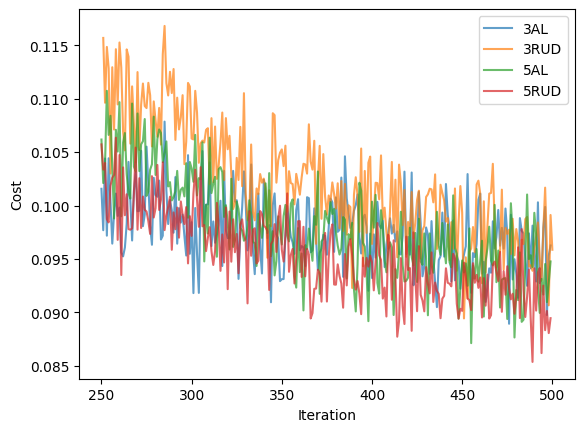

In [16]:
BSE5 = pd.concat([timings(i).rename(columns={0:i.split('/')[2]}) for i in sorted(glob('BSE_RUD_AL_test/5qubit/*/M-M-CZ_HWE-CNOT'))],axis=1)
BSE5

,3AL,3RUD,5AL,5RUD
Num_iter,5835,4953,3340,2760
Total Walltime,26 days 19:31:23,37 days 17:50:31,26 days 17:42:27,29 days 16:52:20
min_time,0 days 00:04:35.605769230,0 days 00:05:20.201492537,0 days 00:06:52.415458937,0 days 00:08:05.403409090
mean_time,0 days 00:07:08.078809902,0 days 00:09:28.482572392,0 days 00:10:26.879568379,0 days 00:14:38.289026619
max_time,0 days 00:08:33.772455089,0 days 00:25:35.717434869,0 days 00:12:33.026548672,0 days 00:16:58.666666666
median_time,0 days 00:07:35.255319148,0 days 00:09:31.613005728,0 days 00:10:57.684615384,0 days 00:15:52.696629213


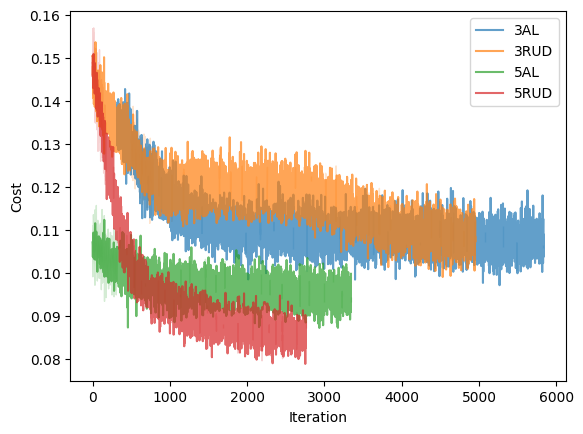

In [17]:


BSE16 = pd.concat([timings(i).rename(columns={0:i.split('/')[2]}) for i in sorted(glob( 'BSE_RUD_AL_test/16qubit/*/A2_Hadamard'))],axis=1)
BSE16

,3AL,3RUD,5AL,5RUD
Num_iter,970,1420,2405,1890
Total Walltime,3 days 23:13:05,10 days 20:19:57,21 days 15:28:15,20 days 14:07:38
min_time,0 days 00:06:54.415458937,0 days 00:08:14.225433526,0 days 00:10:38.654135338,0 days 00:13:06.601851851
mean_time,0 days 00:07:32.003363355,0 days 00:11:02.886588602,0 days 00:13:14.845986827,0 days 00:16:27.532745340
max_time,0 days 00:09:19.653594771,0 days 00:11:26.661290322,0 days 00:15:04.851063829,0 days 00:18:34.578947368
median_time,0 days 00:06:56.972199857,0 days 00:11:20.264000,0 days 00:14:48.994736841,0 days 00:18:19.298701298


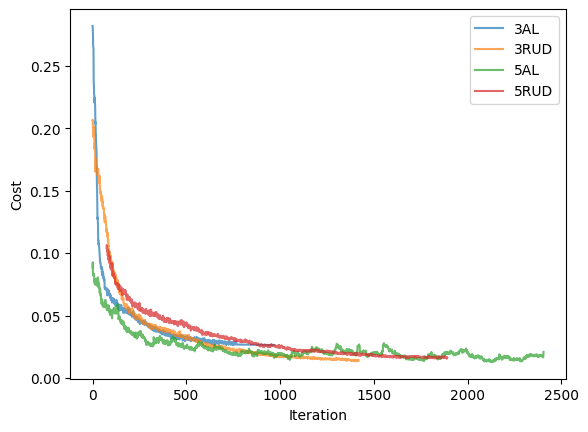

In [18]:

DDCC = pd.concat([timings(i).rename(columns={0:i.split('/')[2]}) for i in sorted(glob('qml_DDCC/RUD_AL/*/A2_HWE-CNOT/'))],axis=1)
DDCC